In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load dataset
df = pd.read_csv("heart.csv") 

In [3]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
761,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
896,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
718,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
743,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
353,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1


In [4]:
df.shape

(1025, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


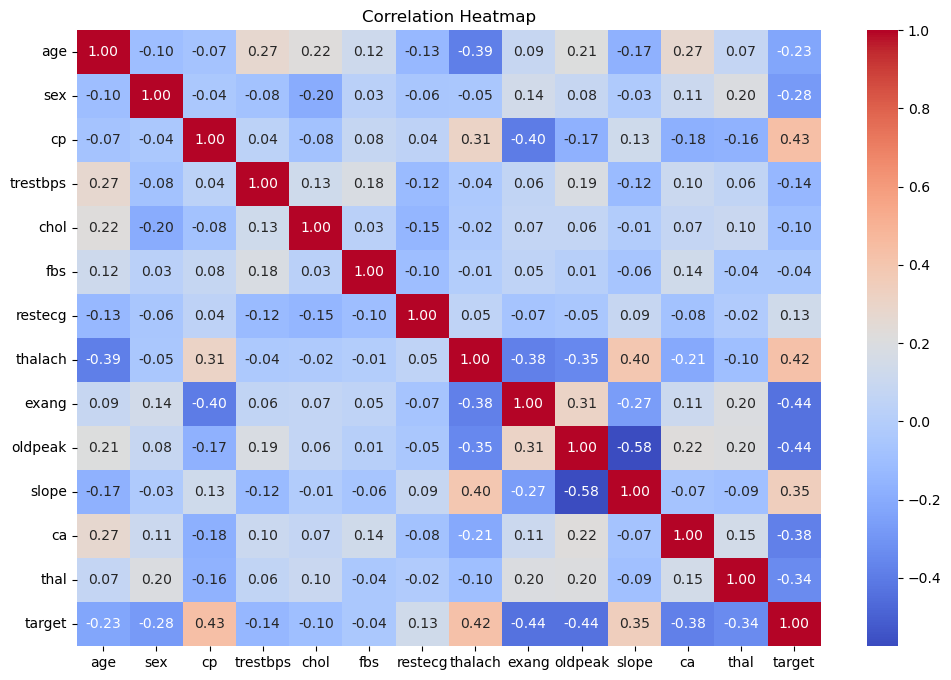

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
df.corr()["target"]

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

In [9]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_file("EDA_Heart2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 32.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

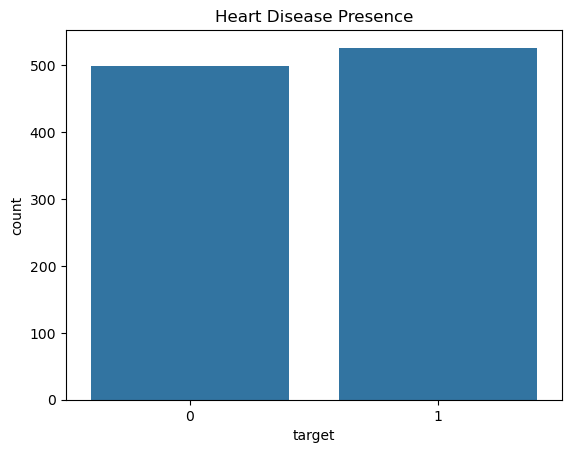

In [10]:
# Countplot of target
sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence")
plt.show()

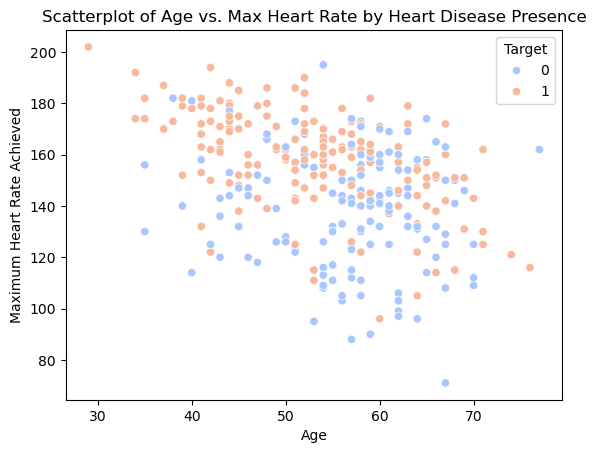

In [11]:
# Scatterplot of two selected features with target classes
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='coolwarm')
plt.title("Scatterplot of Age vs. Max Heart Rate by Heart Disease Presence")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.legend(title='Target')
plt.show()

In [12]:
X = df.drop('target', axis=1)
y = df['target']

In [14]:
sc=StandardScaler()
X_processed = sc.fit_transform(X)

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.1, random_state=5)

In [16]:
# Use Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Predictions
y_pred = model.predict(X_test)

In [18]:
print("\n--- Accuracy Score ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


--- Accuracy Score ---
Accuracy: 91.26%



--- Confusion Matrix ---


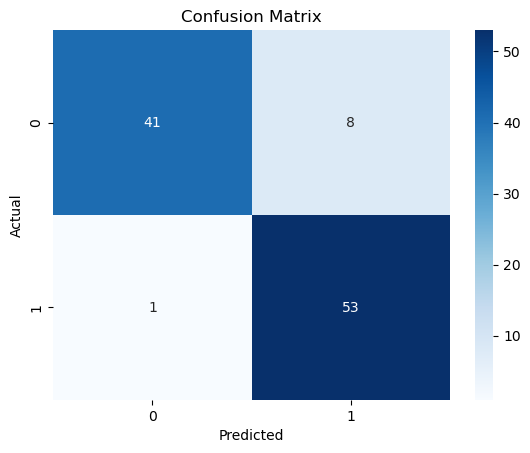

In [19]:
print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# 5. Metrics
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.84      0.90        49
           1       0.87      0.98      0.92        54

    accuracy                           0.91       103
   macro avg       0.92      0.91      0.91       103
weighted avg       0.92      0.91      0.91       103

